In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, learning_curve, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("D:/Swinburne/Sem 3/Innovation Project/Data Sciencne/fraudTest.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [4]:
#Display the data
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
#Sum the missing value
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
#Summary the description of the dataset
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
#Distribute the class
df[('is_fraud')].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [9]:
#Split the column trans_date_trans_time into 2 separate columns, including trans_date and trans_time
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [10]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [11]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_date  555719 non-null  object 
 1   trans_time  555719 non-null  object 
 2   cc_num      555719 non-null  int64  
 3   merchant    555719 non-null  object 
 4   category    555719 non-null  object 
 5   amt         555719 non-null  float64
 6   first       555719 non-null  object 
 7   last        555719 non-null  object 
 8   gender      555719 non-null  object 
 9   street      555719 non-null  object 
 10  city        555719 non-null  object 
 11  state       555719 non-null  object 
 12  zip         555719 non-null  int64  
 13  lat         555719 non-null  float64
 14  long        555719 non-null  float64
 15  city_pop    555719 non-null  int64  
 16  job         555719 non-null  object 
 17  dob         555719 non-null  object 
 18  trans_num   555719 non-null  object 
 19  un

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [13]:
# Convert 'dob' to datetime
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


# Feature Engineering

# 1. Transaction Frequency Features

In [14]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean       601.427489
median     634.500000
min          6.000000
max       1474.000000
Name: cc_num, dtype: float64

In [15]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())


             cc_num trans_date  transactions_per_day
0  2291163933867244 2020-06-21                    21
1  3573030041201292 2020-06-21                    36
2  3598215285024754 2020-06-21                    45
3  3591919803438423 2020-06-21                    29
4  3526826139003047 2020-06-21                    29


In [16]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2291163933867244    25                     2
1  3573030041201292    25                     4
2  3598215285024754    25                     3
3  3591919803438423    25                     3
4  3526826139003047    25                     4


In [17]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
6      30058
7      85848
8      88759
9      69533
10     69348
11     72635
12    139538
dtype: int64


In [18]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2291163933867244 2020-06-21                      34
1  3573030041201292 2020-06-21                      49
2  3598215285024754 2020-06-21                      55
3  3591919803438423 2020-06-21                      33
4  3526826139003047 2020-06-21                      56


In [19]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

## 2. User Transaction Behavior

In [20]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')



In [21]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,is_fraud,transactions_per_day,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount
0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,0,21,25,2,34,34,61.893062,39611.56,44.230,158.690646
1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,0,36,25,4,49,49,53.596523,44860.29,35.590,102.395948
2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,0,45,25,3,55,55,83.053812,89116.74,54.290,103.740968
3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,0,29,25,3,33,33,59.207526,39254.59,39.680,108.530732
4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,0,29,25,4,56,56,55.274501,49249.58,37.670,76.159193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,0,8,53,24,172,335,72.595446,45589.94,40.395,158.873104
555715,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,0,23,53,47,286,557,46.529792,51415.42,20.690,108.069341
555716,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,0,20,53,36,295,540,92.682790,100004.73,54.360,143.328587
555717,2020-12-31,23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,0,11,53,25,201,441,58.129411,51328.27,36.880,79.056680


## 3. User-Based Features: Age and Gender

In [22]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])

mean      46.390496
median    44.000000
min       15.000000
max       96.000000
Name: age, dtype: float64

In [23]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)




 The number of cutomers based on age is:
F    304886
M    250833
Name: gender, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    21155705.55
M    17407197.56
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    69.388905
M    69.397558
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       46.300604    44.0
M       46.499759    45.0
----------------------------------------


## 4. Fraud Transaction Analysis

In [24]:
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')


#Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] /fraud_ratio_per_user['total_transactions']

# Print formatted output
print('\nThe ratio of fraudulent transaction to total transaction per user:')
for index, row in fraud_ratio_per_user.iterrows():
    print(f"Credit Card Number {int(row['cc_num'])}: {row['fraud_ratio']:.2%}")



The ratio of fraudulent transaction to total transaction per user:
Credit Card Number 60416207185: 0.00%
Credit Card Number 60422928733: 0.00%
Credit Card Number 60423098130: 0.00%
Credit Card Number 60427851591: 0.00%
Credit Card Number 60487002085: 3.35%
Credit Card Number 60490596305: 0.00%
Credit Card Number 60495593109: 5.36%
Credit Card Number 501802953619: 0.00%
Credit Card Number 501828204849: 0.00%
Credit Card Number 501831082224: 0.00%
Credit Card Number 501882822387: 5.08%
Credit Card Number 501899453424: 0.00%
Credit Card Number 502012776709: 0.00%
Credit Card Number 502038091380: 0.00%
Credit Card Number 502049568400: 0.00%
Credit Card Number 503848303379: 0.00%
Credit Card Number 503851367360: 100.00%
Credit Card Number 503874407318: 0.00%
Credit Card Number 560881134780: 0.00%
Credit Card Number 561942763351: 0.00%
Credit Card Number 565399283797: 0.00%
Credit Card Number 567868110212: 0.00%
Credit Card Number 568279015842: 0.00%
Credit Card Number 570273151375: 5.58%
C

## 5. Geography Analysis

### 5.1 Distance calculation using Haversine calculation

This function  the great-circle distance between two points on the Earth's surface given their latitude and longitude coordinates. This function can be applied to gain insights from a dataset that includes geographical information, such as the coordinates of customer locations and merchant locations. 
* Are customers close to their preferred merchants? 
* Customer segmentation (near, moderate, far)
* 

In [25]:
# Create the Haversine function using transaction longitude and latitude, also using merchant's longitude and latitude
def haversine(lat1, lon1, lat2, lon2):
    # Distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # Convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
         math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

df['distance_to_merch'] = df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [26]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,distance_to_merch
0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,25,2,34,34,61.893062,39611.56,44.230,158.690646,52,24.561462
1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,25,4,49,49,53.596523,44860.29,35.590,102.395948,30,104.925092
2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,25,3,55,55,83.053812,89116.74,54.290,103.740968,49,59.080078
3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,25,3,33,33,59.207526,39254.59,39.680,108.530732,32,27.698567
4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,25,4,56,56,55.274501,49249.58,37.670,76.159193,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,53,24,172,335,72.595446,45589.94,40.395,158.873104,54,77.026148
555715,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,53,47,286,557,46.529792,51415.42,20.690,108.069341,21,100.074420
555716,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,53,36,295,540,92.682790,100004.73,54.360,143.328587,39,80.759302
555717,2020-12-31,23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,53,25,201,441,58.129411,51328.27,36.880,79.056680,55,52.933240


In [27]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)



Aggregated transaction amounts by city:
                          city       amt
0                      Achille   9511.00
1                      Acworth  80383.39
2                        Adams  20631.64
3                        Afton  59000.66
4                        Akron  18512.11
..                         ...       ...
844                Woods Cross  20281.72
845                  Woodville  42032.17
846  Yellowstone National Park  16073.89
847                    Zaleski  59080.41
848                    Zavalla  47801.39

[849 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK    66071.94
1     AL  1127922.81
2     AR  1027950.44
3     AZ   347901.59
4     CA  1768791.26
5     CO   447073.46
6     CT   205176.90
7     DC   108781.32
8     FL  1293183.50
9     GA   780302.43
10    HI    64858.25
11    IA   770590.61
12    ID   197705.27
13    IL  1309975.89
14    IN   846750.31
15    KS   711303.48
16   

In [28]:
df

,trans_date,trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,Week,transaction_per_week,transactions_per_month,transactions_per_season,avg_trans_amount,total_trans_amount,med_trans_amount,std_trans_amount,age,distance_to_merch
0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,25,2,34,34,61.893062,39611.56,44.230,158.690646,52,24.561462
1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,25,4,49,49,53.596523,44860.29,35.590,102.395948,30,104.925092
2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,25,3,55,55,83.053812,89116.74,54.290,103.740968,49,59.080078
3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,25,3,33,33,59.207526,39254.59,39.680,108.530732,32,27.698567
4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,25,4,56,56,55.274501,49249.58,37.670,76.159193,64,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31,23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,53,24,172,335,72.595446,45589.94,40.395,158.873104,54,77.026148
555715,2020-12-31,23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,53,47,286,557,46.529792,51415.42,20.690,108.069341,21,100.074420
555716,2020-12-31,23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,53,36,295,540,92.682790,100004.73,54.360,143.328587,39,80.759302
555717,2020-12-31,23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,53,25,201,441,58.129411,51328.27,36.880,79.056680,55,52.933240


## Merchant-based Features

In [29]:
# Merchant-Based Features
df['merchant_trans_count'] = df.groupby('merchant')['trans_num'].transform('count')
df['merchant_trans_amount'] = df.groupby('merchant')['amt'].transform('sum')
df['merchant_fraud_ratio'] = df.groupby('merchant')['is_fraud'].transform('mean')

## Category Based Features

In [32]:
# Category-Based Features
df['category_trans_count'] = df.groupby('category')['trans_num'].transform('count')
df['category_trans_amount'] = df.groupby('category')['amt'].transform('sum')
df['category_fraud_ratio'] = df.groupby('category')['is_fraud'].transform('mean')

## Temporal Features

Time Since Last Transaction: Time difference between the current transaction and the previous transaction.\p
Is Holiday: Indicator if the transaction date is a public holiday

In [33]:
# Temporal Features
holidays = pd.to_datetime(['2023-01-01', '2023-12-25'])  # Example holidays, replace with actual dates
df['is_holiday'] = df['trans_date'].isin(holidays)

In [35]:
df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_date               555719 non-null  datetime64[ns]
 1   trans_time               555719 non-null  object        
 2   cc_num                   555719 non-null  int64         
 3   merchant                 555719 non-null  object        
 4   category                 555719 non-null  object        
 5   amt                      555719 non-null  float64       
 6   first                    555719 non-null  object        
 7   last                     555719 non-null  object        
 8   gender                   555719 non-null  object        
 9   street                   555719 non-null  object        
 10  city                     555719 non-null  object        
 11  state                    555719 non-null  object        
 12  zip             

# Oversampling Data

In [37]:
# List of columns to drop (date-related columns)
date_columns = ['trans_date','trans_num','first','last','dob','Week']

# Drop date-related columns from df
df_selected_features = df.drop(date_columns, axis=1)

# Encode categorical variables
label_encoders = {}
for column in df_selected_features.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    df_selected_features[column] = label_encoders[column].fit_transform(df_selected_features[column])

# Prepare X and y
X = df_selected_features.drop(['is_fraud'], axis=1)
y = df_selected_features['is_fraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling to handle class imbalance
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [38]:
# Count occurrences of each class in y_train_resampled
fraud_count = pd.Series(y_train_resampled).value_counts()

print(f"Fraud class distribution after resampling:\n{fraud_count}")

Fraud class distribution after resampling:
0    1719
1    1719
Name: is_fraud, dtype: int64


In [45]:
# Calculate correlation matrix
correlation_matrix = X_train_resampled.corr()

correlation_matrix

,trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,std_trans_amount,age,distance_to_merch,merchant_trans_count,merchant_trans_amount,merchant_fraud_ratio,category_trans_count,category_trans_amount,category_fraud_ratio,is_holiday
trans_time,1.000000,-0.025314,0.004516,0.338548,0.225362,0.013862,0.006884,-0.015282,-0.002309,0.003569,...,0.027661,-0.018643,0.017286,-0.189400,-0.347859,-0.041560,-0.222961,-0.375605,-0.095741,NaN
cc_num,-0.025314,1.000000,-0.003775,-0.004687,-0.043131,-0.051206,0.067738,0.097473,-0.015812,0.007072,...,0.165857,-0.052299,0.007445,-0.026561,-0.044625,-0.035305,-0.017457,-0.036378,-0.042277,NaN
merchant,0.004516,-0.003775,1.000000,0.021906,-0.005115,-0.006452,0.001062,-0.002470,-0.032851,0.008462,...,-0.011393,-0.013430,-0.006170,-0.009910,-0.011832,-0.001336,0.002171,-0.002512,-0.005961,NaN
category,0.338548,-0.004687,0.021906,1.000000,0.408618,0.007034,-0.008397,-0.007669,-0.017124,0.016585,...,0.035574,0.004263,-0.035895,-0.212418,-0.118821,0.302159,-0.257370,-0.139247,0.330677,NaN
amt,0.225362,-0.043131,-0.005115,0.408618,1.000000,0.061468,-0.013422,0.003748,-0.055710,0.003517,...,0.150876,0.045229,-0.042025,-0.060671,0.154568,0.587415,-0.099392,0.131783,0.616014,NaN
gender,0.013862,-0.051206,-0.006452,0.007034,0.061468,1.000000,0.073001,0.032988,-0.014349,-0.082952,...,-0.015134,0.000509,0.003143,0.020471,0.058280,0.067752,0.022018,0.059095,0.083808,NaN
street,0.006884,0.067738,0.001062,-0.008397,-0.013422,0.073001,1.000000,-0.005068,0.006252,-0.125342,...,0.015740,-0.021314,0.004538,-0.002252,-0.010532,-0.016311,0.005495,-0.006580,-0.017060,NaN
city,-0.015282,0.097473,-0.002470,-0.007669,0.003748,0.032988,-0.005068,1.000000,-0.038912,0.055196,...,-0.000117,-0.009968,0.009557,-0.007481,-0.014195,-0.017814,-0.016133,-0.019645,-0.019677,NaN
state,-0.002309,-0.015812,-0.032851,-0.017124,-0.055710,-0.014349,0.006252,-0.038912,1.000000,-0.112404,...,-0.121928,0.000262,-0.034234,-0.017604,-0.054156,-0.046588,-0.003881,-0.042007,-0.051575,NaN
zip,0.003569,0.007072,0.008462,0.016585,0.003517,-0.082952,-0.125342,0.055196,-0.112404,1.000000,...,-0.002489,-0.025640,0.011108,-0.019154,-0.011442,0.004370,-0.009548,-0.010127,-0.009968,NaN


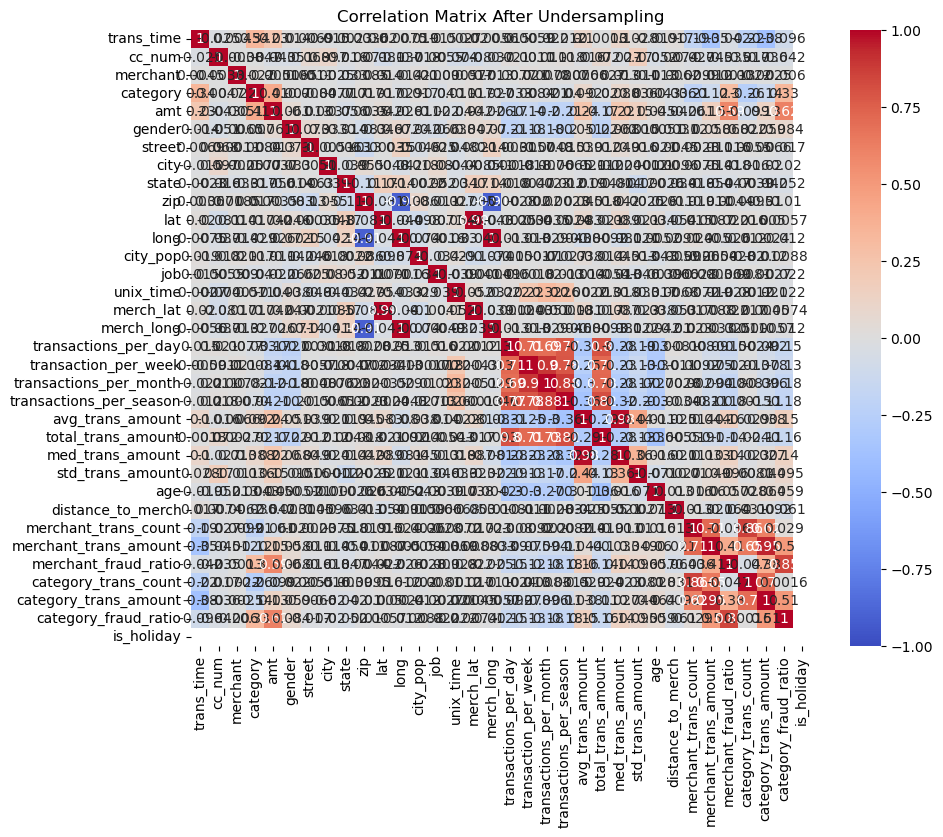

In [47]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Undersampling')
plt.show()

Based on the correlation matrix provided, we can identify features that have positive or negative relationships with the target variable `is_fraud`. Here's a detailed analysis:

### Positive Correlation with `is_fraud`
- **category (0.330677)**: This suggests that certain categories of transactions are more likely to be fraudulent.
- **amt (0.616014)**: Higher transaction amounts are positively correlated with fraud.
- **merchant_fraud_ratio (0.846450)**: A higher fraud ratio for merchants is strongly associated with fraudulent transactions.
- **category_fraud_ratio (0.505802)**: A higher fraud ratio in transaction categories is also strongly associated with fraudulent transactions.

### Negative Correlation with `is_fraud`
- **trans_time (-0.095741)**: The time of the transaction has a slight negative correlation with fraud, indicating certain times may see fewer fraudulent transactions.
- **merchant_trans_count (-0.222961)**: The number of transactions per merchant is negatively correlated with fraud, suggesting that merchants with more transactions might have fewer fraudulent transactions.
- **category_trans_count (-0.257370)**: The number of transactions in each category has a negative correlation with fraud, implying that categories with more transactions tend to have fewer fraudulent ones.
- **category_trans_amount (-0.375605)**: The total transaction amount per category is negatively correlated with fraud.
- **merchant_trans_amount (-0.347859)**: The total transaction amount per merchant is negatively correlated with fraud.

### Summary
The features with the strongest correlations (both positive and negative) with `is_fraud` are:
- **Positive Correlations**: `amt`, `merchant_fraud_ratio`, `category_fraud_ratio`
- **Negative Correlations**: `category_trans_amount`, `merchant_trans_amount`, `merchant_trans_count`, `category_trans_count`

These insights can guide the feature selection process for your fraud detection model, focusing on the most influential variables.

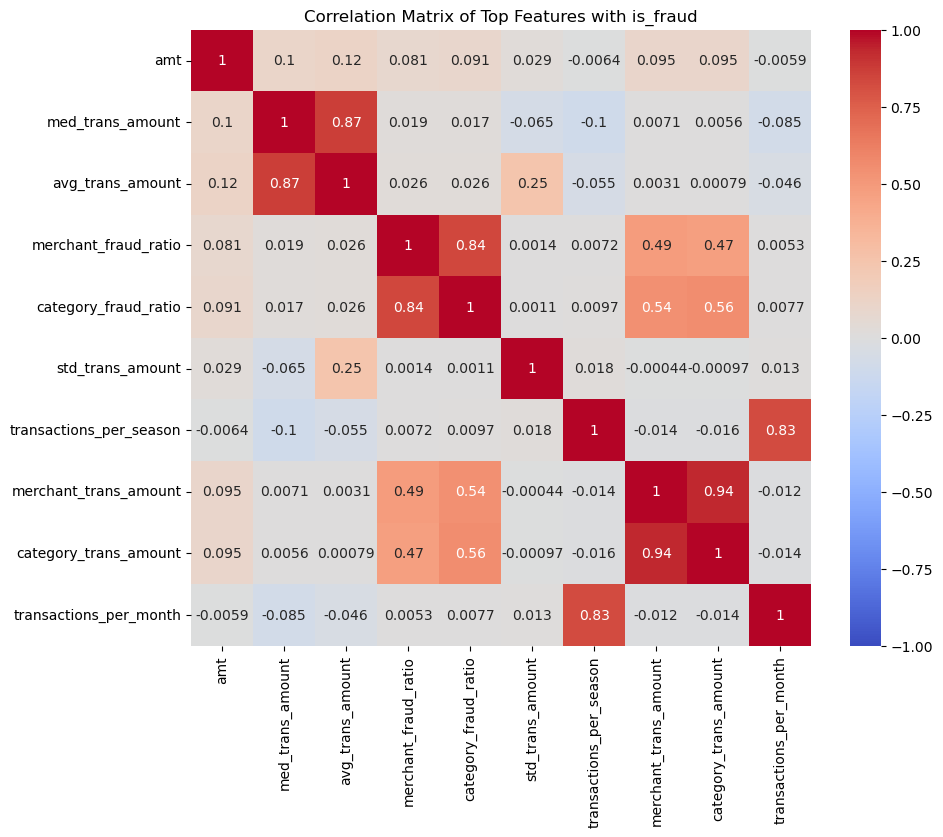

In [49]:
# Compute correlation matrix with the target variable
correlation_matrix = df_selected_features.corr()

# Get absolute correlations with the target variable
correlation_with_target = correlation_matrix['is_fraud'].abs().sort_values(ascending=False)

# Select top features based on correlation threshold (e.g., top 10)
top_features = correlation_with_target[1:11].index.tolist()  # Exclude 'is_fraud' itself

# Filter the correlation matrix to include only top features
top_features_corr = correlation_matrix.loc[top_features, top_features]

# Plotting the correlation matrix for top features
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top Features with is_fraud')
plt.show()

In [48]:
# Plotting the correlation matrix for top features
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Top Features')
plt.show()


NameError: name 'top_features_corr' is not defined

<Figure size 1000x800 with 0 Axes>

# Model Development

In [39]:
# Define models and their respective parameter grids for tuning
models = {
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    })
}

In [40]:
# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
# Dictionary to hold model results
model_results = {}

for model_name, (model, param_grid) in models.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    
    # Train the best model on the full training data
    best_model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on test data
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        'best_params': grid_search.best_params_,
        'cross_val_score': mean_cv_score,
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': confusion
    }

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Print the results
for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Best Parameters: {results['best_params']}")
    print(f"Cross-Validation Accuracy: {results['cross_val_score']}")
    print(f"Test Accuracy: {results['accuracy']}")
    print("Classification Report:")
    print(results['classification_report'])
    print("Confusion Matrix:")
    print(results['confusion_matrix'])
    print("\n")

Model: Logistic Regression
Best Parameters: {'C': 0.01, 'solver': 'liblinear'}
Cross-Validation Accuracy: 0.5
Test Accuracy: 0.003832865471820341
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    110718
           1       0.00      1.00      0.01       426

    accuracy                           0.00    111144
   macro avg       0.00      0.50      0.00    111144
weighted avg       0.00      0.00      0.00    111144

Confusion Matrix:
[[     0 110718]
 [     0    426]]


Model: Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Accuracy: 0.9674257811177686
Test Accuracy: 0.9736827898941913
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    110718
           1       0.12      0.97      0.22       426

    accuracy                           0.97    111144
   macro avg       0.56    

In [43]:
# Parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier()

# Perform grid search
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters and best score
print(f"Best parameters for K-Nearest Neighbors: {knn_grid_search.best_params_}")
print(f"Best cross-validation score: {knn_grid_search.best_score_:.2f}")

# Use the best model to predict on the test set
best_knn_clf = knn_grid_search.best_estimator_
y_pred_knn = best_knn_clf.predict(X_test)
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.89
Accuracy on test set: 0.83
              precision    recall  f1-score   support

           0       1.00      0.83      0.91    110718
           1       0.02      1.00      0.04       426

    accuracy                           0.83    111144
   macro avg       0.51      0.91      0.47    111144
weighted avg       1.00      0.83      0.90    111144

